CLUSTER ALGORITHMS

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import matplotlib.pylab

#CREATING 
matrix = np.array([[2.7, 3.3, 3.4, 3.0, 3.1, 3.4, 3.0, 2.7],
                    [3.9, 2.8, 2.6, 4.0, 2.6, 3.0, 3.2, 3.0],
                    [1.5, 0.5, 1.9, 1.4, 0.3, 1.4, 1.2, 1.3],
                    [2.5, 2.9, 3.4, 3.0, 3.2, 3.1, 3.2, 2.8]])

df = pd.DataFrame(matrix, columns=[f'Var{i+1}' for i in range(matrix.shape[1])])
print(df)#

#para usar um dado binario:
# media = np.mean(df, axis = 0)
# df_bin = df
# for i, col in enumerate(df.columns):
#     df_bin[col] = np.where(df[col] > media[col], 1, 0)

# print(df_bin)

   Var1  Var2  Var3  Var4  Var5  Var6  Var7  Var8
0   2.7   3.3   3.4   3.0   3.1   3.4   3.0   2.7
1   3.9   2.8   2.6   4.0   2.6   3.0   3.2   3.0
2   1.5   0.5   1.9   1.4   0.3   1.4   1.2   1.3
3   2.5   2.9   3.4   3.0   3.2   3.1   3.2   2.8


In [2]:
def clusterization(df, target_clusters=1, metric='euclidean'):
    # Passo 1: Inicialmente, cada ponto é um cluster
    matrix = df.copy()
    n = len(matrix)
    clusters = {i: [i] for i in range(n)}
    distclusters = [] 
    # Passo 2: Computa a matriz de distâncias entre todos os pontos

    
    while len(clusters) > target_clusters:
        distances = pdist(matrix, metric=metric)
        distance_matrix = squareform(distances)
        
        # Configura para não considerar a diagonal
        np.fill_diagonal(distance_matrix, np.inf)
        # Passo 3: Encontra os dois clusters mais próximos
        i, j = np.unravel_index(np.argmin(distance_matrix), distance_matrix.shape)
        min_value = np.min(distance_matrix)
        distclusters.append([f'{i}-{j}', float(min_value)])
        
        # Passo 4: Unir os dois clusters mais próximos
        print(clusters)
        clusters[i].extend(clusters[j])  # Adiciona os pontos do cluster j ao cluster i
        
        #calculo o centroido do grupo
        centroid = np.mean([matrix.iloc[i], matrix.iloc[j]], axis=0)
        matrix.iloc[i] = centroid
        matrix.drop(j, inplace=True)
        print(matrix)
        print("mudou a linha", i)
        del clusters[j]  # Remove o cluster j
        
        # Atualiza os índices da matriz e dos clusters
        matrix.reset_index(drop=True, inplace=True)
        clusters = {idx: clusters[c] for idx, c in enumerate(clusters.keys())}
        
        print("Clusters atuais:", clusters)
        
    print(clusters)
    print(distclusters)
    return clusters

# Exemplo de uso
clusters = clusterization(df, target_clusters=1)
print("Clusters finais:", clusters)

{0: [0], 1: [1], 2: [2], 3: [3]}
   Var1  Var2  Var3  Var4  Var5  Var6  Var7  Var8
0   2.6   3.1   3.4   3.0  3.15  3.25   3.1  2.75
1   3.9   2.8   2.6   4.0  2.60  3.00   3.2  3.00
2   1.5   0.5   1.9   1.4  0.30  1.40   1.2  1.30
mudou a linha 0
Clusters atuais: {0: [0, 3], 1: [1], 2: [2]}
{0: [0, 3], 1: [1], 2: [2]}
   Var1  Var2  Var3  Var4   Var5   Var6  Var7   Var8
0  3.25  2.95   3.0   3.5  2.875  3.125  3.15  2.875
2  1.50  0.50   1.9   1.4  0.300  1.400  1.20  1.300
mudou a linha 0
Clusters atuais: {0: [0, 3, 1], 1: [2]}
{0: [0, 3, 1], 1: [2]}
    Var1   Var2  Var3  Var4    Var5    Var6   Var7    Var8
0  2.375  1.725  2.45  2.45  1.5875  2.2625  2.175  2.0875
mudou a linha 0
Clusters atuais: {0: [0, 3, 1, 2]}
{0: [0, 3, 1, 2]}
[['0-3', 0.5916079783099616], ['0-1', 1.9640519341402354], ['0-1', 5.529410004693087]]
Clusters finais: {0: [0, 3, 1, 2]}


In [24]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


def dist(x, y):
    distance = np.linalg.norm(x - y)
    return distance

def agglomerative_clustering(df, target_clusters=1, method='averagelinkage'): 
    #using agglomerative algorithms for groups distance
    # Passo 1: Inicialmente, cada ponto é um cluster
    matrix = df.copy()
    n = len(matrix)
    clusters = {i: [i] for i in range(n)}
    distclusters = [] 
    # Passo 2: Computa a matriz de distâncias entre todos os pontos
    distances = pdist(matrix)
    distance_matrix = squareform(distances) 

    while len(matrix) > target_clusters:
        distances = pdist(matrix)
        distance_matrix = squareform(distances) 
        print(len(matrix))
        
        # Configura para não considerar a diagonal
        np.fill_diagonal(distance_matrix, np.inf)
        # Passo 3: Encontra os dois clusters mais próximos
        i, j = np.unravel_index(np.argmin(distance_matrix), distance_matrix.shape)
        
        min_value = np.min(distance_matrix)
        if not distclusters:  # Adiciona min_value apenas no primeiro agrupamento
            distclusters.append([f'{i}-{j}', float(min_value)])
        
        # Passo 4: Unir os dois clusters mais próximos
        print("Imprimindo os clusters", clusters)
        clusters[i].extend(clusters[j])  # Adiciona os pontos do cluster j ao cluster i

        Rmatrix = matrix.drop([i, j])
        P = np.mean(matrix.iloc[[i]], axis=0)
        Q = np.mean(matrix.iloc[[j]], axis=0)
        PQ = matrix.iloc[[i, j]]
        PQcentroid = np.mean(PQ, axis=0)

        matrix.iloc[i] = PQcentroid
        matrix.drop(j, inplace=True)
        
        params = {
            'singlelinkage': (1/2, 1/2, 0, -1/2),
            'completelinkage': (1/2, 1/2, 0, 1/2),
            'averagelinkage': (1/2, 1/2, 0, 0),
            'ward': (1/2, 1/2, 0, 0)
        }

        if method not in params:
            raise ValueError(f"Método desconhecido: {method}")

        delta1, delta2, delta3, delta4 = params[method]
        
        for index, row in matrix.iterrows():
            if index != i:  # Evita calcular a distância com ele mesmo
                group_dist = (delta1 * dist(row, P) + delta2 * dist(row, Q) + 
                              delta3 * dist(P, Q) + delta4 * abs(dist(row, P) - dist(row, Q)))
                print(f"DISTÂNCIA ENTRE {i}-{j} E {index}: {group_dist}")
                distclusters.append([f'{i}-{j}-{index}', float(group_dist)])

        del clusters[j]  # Remove o cluster j
        # Atualiza os índices da matriz e dos clusters
        matrix.reset_index(drop=True, inplace=True)
        clusters = {idx: clusters[c] for idx, c in enumerate(clusters.keys())}
        
        print("Clusters atuais:", clusters)
    print(clusters)
    print(distclusters)


    
    return clusters, distclusters

# Exemplo de uso
clusters, distancias = agglomerative_clustering(df, target_clusters=1)
print("Clusters finais:", clusters)



4
Imprimindo os clusters {0: [0], 1: [1], 2: [2], 3: [3]}
DISTÂNCIA ENTRE 0-3 E 1: 1.986112661433471
DISTÂNCIA ENTRE 0-3 E 2: 5.487860759559073
Clusters atuais: {0: [0, 3], 1: [1], 2: [2]}
3
Imprimindo os clusters {0: [0, 3], 1: [1], 2: [2]}
DISTÂNCIA ENTRE 0-1 E 2: 5.614345458606749
Clusters atuais: {0: [0, 3, 1], 1: [2]}
2
Imprimindo os clusters {0: [0, 3, 1], 1: [2]}
Clusters atuais: {0: [0, 3, 1, 2]}
{0: [0, 3, 1, 2]}
[['0-3', 0.5916079783099616], ['0-3-1', 1.986112661433471], ['0-3-2', 5.487860759559073], ['0-1-2', 5.614345458606749]]
Clusters finais: {0: [0, 3, 1, 2]}


In [25]:
distancias

[['0-3', 0.5916079783099616],
 ['0-3-1', 1.986112661433471],
 ['0-3-2', 5.487860759559073],
 ['0-1-2', 5.614345458606749]]

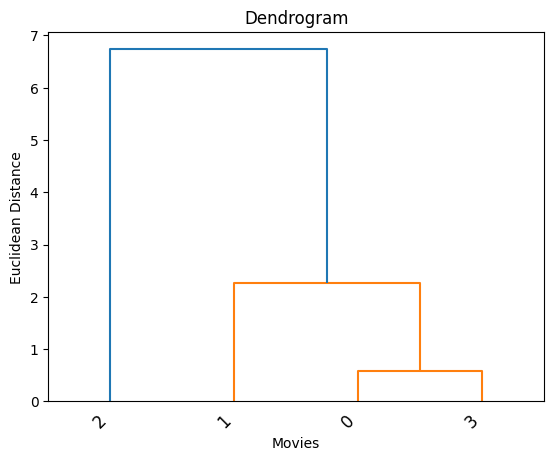

In [26]:
linkage_data = linkage(matrix, method='ward', metric='euclidean')
dendrogram(linkage_data) #usei o chatgpt aqui para me ajudar a plotar os labels, não tava sabendo com, só isso
plt.title('Dendrogram')
plt.xlabel('Movies')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=45, ha='right')
plt.show()


# PCA

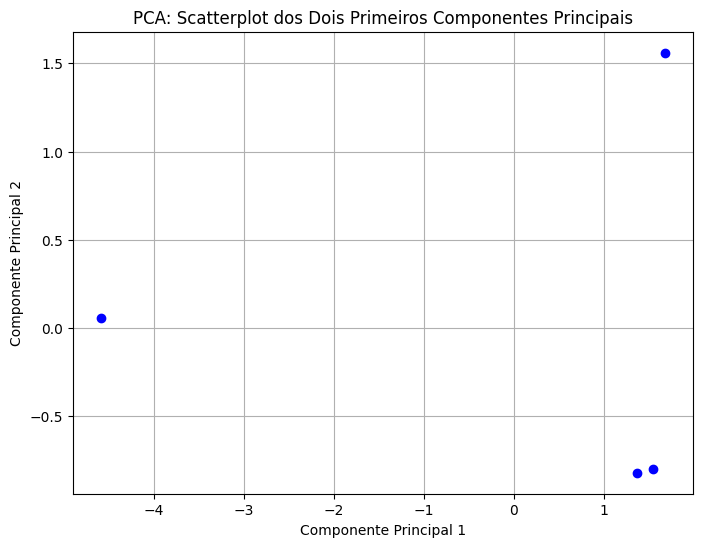

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Criando a matriz
matrix = np.array([[2.7, 3.3, 3.4, 3.0, 3.1, 3.4, 3.0, 2.7],
                    [3.9, 2.8, 2.6, 4.0, 2.6, 3.0, 3.2, 3.0],
                    [1.5, 0.5, 1.9, 1.4, 0.3, 1.4, 1.2, 1.3],
                    [2.5, 2.9, 3.4, 3.0, 3.2, 3.1, 3.2, 2.8]])

df = pd.DataFrame(matrix, columns=[f'Var{i+1}' for i in range(matrix.shape[1])])


# Padronizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Criar um DataFrame com os dois primeiros componentes principais
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotar o scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='blue', marker='o')
plt.title('PCA: Scatterplot dos Dois Primeiros Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()
